In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [219]:
# Loading data & drop unnecessary columns
file_path = './dataset/auto-mpg.csv'
data = pd.read_csv(file_path, usecols=['mpg', 'horsepower'], nrows=200)

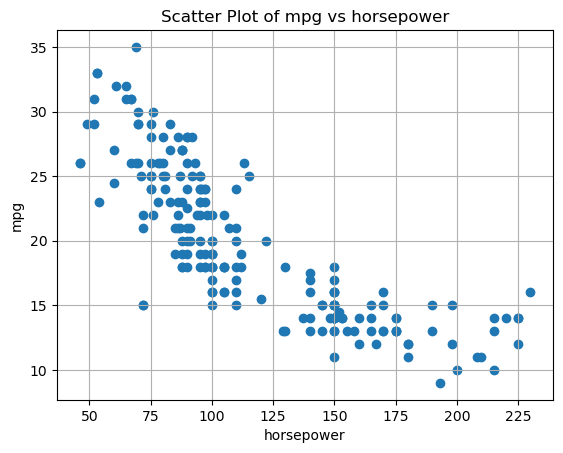

In [220]:
# This is how our first data looks like
plt.scatter(data['horsepower'], data['mpg'])
plt.title(f'Scatter Plot of mpg vs horsepower')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)
plt.show()

In [187]:
# Convert pandas dataframe to numpy array (matrix)
array_data = data.to_numpy()
print(array_data)


[[ 18.  130. ]
 [ 15.  165. ]
 [ 18.  150. ]
 [ 16.  150. ]
 [ 17.  140. ]
 [ 15.  198. ]
 [ 14.  220. ]
 [ 14.  215. ]
 [ 14.  225. ]
 [ 15.  190. ]
 [ 15.  170. ]
 [ 14.  160. ]
 [ 15.  150. ]
 [ 14.  225. ]
 [ 24.   95. ]
 [ 22.   95. ]
 [ 18.   97. ]
 [ 21.   85. ]
 [ 27.   88. ]
 [ 26.   46. ]
 [ 25.   87. ]
 [ 24.   90. ]
 [ 25.   95. ]
 [ 26.  113. ]
 [ 21.   90. ]
 [ 10.  215. ]
 [ 10.  200. ]
 [ 11.  210. ]
 [  9.  193. ]
 [ 27.   88. ]
 [ 28.   90. ]
 [ 25.   95. ]
 [ 25.   75. ]
 [ 19.  100. ]
 [ 16.  105. ]
 [ 17.  100. ]
 [ 19.   88. ]
 [ 18.  100. ]
 [ 14.  165. ]
 [ 14.  175. ]
 [ 14.  153. ]
 [ 14.  150. ]
 [ 12.  180. ]
 [ 13.  170. ]
 [ 13.  175. ]
 [ 18.  110. ]
 [ 22.   72. ]
 [ 19.  100. ]
 [ 18.   88. ]
 [ 23.   86. ]
 [ 28.   90. ]
 [ 30.   70. ]
 [ 30.   76. ]
 [ 31.   65. ]
 [ 35.   69. ]
 [ 27.   60. ]
 [ 26.   70. ]
 [ 24.   95. ]
 [ 25.   80. ]
 [ 23.   54. ]
 [ 20.   90. ]
 [ 21.   86. ]
 [ 13.  165. ]
 [ 14.  175. ]
 [ 15.  150. ]
 [ 14.  153. ]
 [ 17.  15

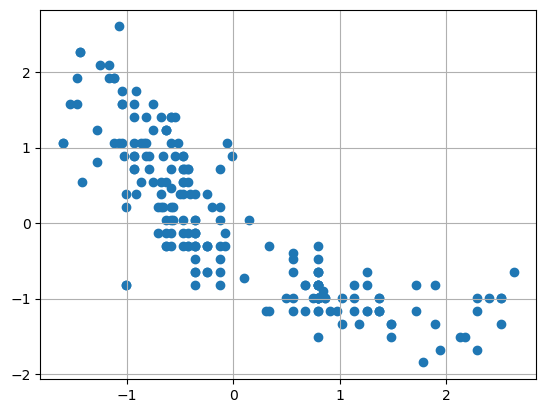

In [188]:
# Standardize the data + Calculate covariance matrix
std_scaler = StandardScaler()
array_data = std_scaler.fit_transform(array_data)
# array_data = preprocessing.scale(array_data)
plt.scatter(array_data[:, 1], array_data[:, 0])
plt.grid()



In [206]:
#PCA
pca = PCA(n_components=2, whiten=True)
pca.fit_transform(array_data)

print(pca.components_)
print(pca.explained_variance_)
print(sum(pca.explained_variance_ratio_))
print(pca.mean_)


[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[1.82666444 0.18338581]
1.0
[-2.48689958e-16  0.00000000e+00]


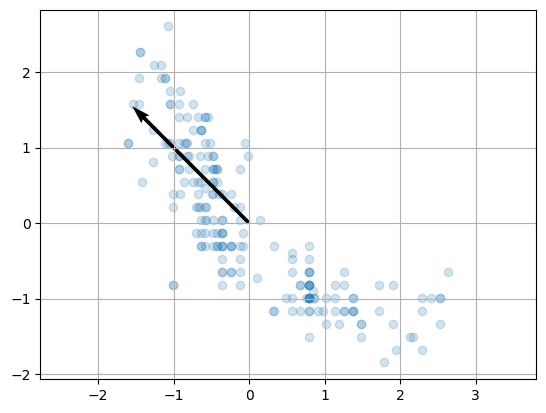

In [214]:
# plot data for eigenvector
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.2)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale=3)
plt.axis('equal')
plt.grid()

In [216]:
# Calculate PCA for dimension reduction
pca_new = PCA(n_components=1)
pca_new.fit(array_data)
array_data_pca = pca_new.transform(array_data)
array_data_new = pca_new.inverse_transform(array_data_pca)


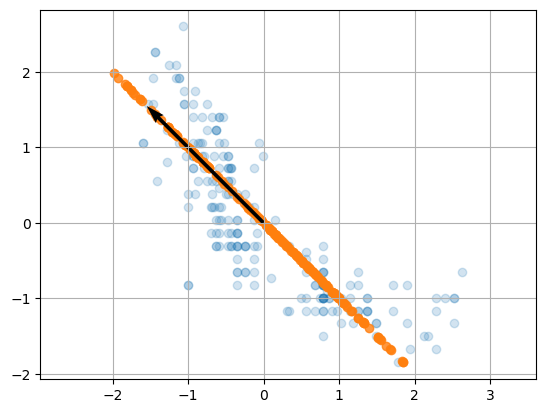

In [217]:
# plot all data
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.2)
plt.scatter(array_data_new[:, 0], array_data_new[:, 1], alpha=0.8)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale=3)
plt.axis('equal')
plt.grid()